In [1]:
import imageio
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from tetris_env import TetrisEnv, capture_frames
from tetris_train import train_model, create_env, CustomCallback, model_learn, env_quck_test, play_and_record
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt

# Verify imports
print("Imports successful")


Imports successful


In [2]:
env_quck_test()

Initial observation shape: (18, 10)
Step result: observation shape=(18, 10), reward=0.0, done=False


In [3]:
env = create_env('Tetris.gb')

Initializing PyBoy with ROM: Tetris.gb
Environment created with 1 vectorized environments.


In [4]:
# Initialize the model. If you have a saved model, you can continue training it!
model, custom_callback = train_model(env)

Training on: cpu
Using cpu device
PPO model initialized.


In [5]:
model = model_learn(model, custom_callback, timesteps=1000000)

Starting model training...
Logging to ./ppo_tetris_tensorboard/PPO_43


Output()

-----------------------------
| time/              |      |
|    fps             | 289  |
|    iterations      | 1    |
|    time_elapsed    | 7    |
|    total_timesteps | 2048 |
-----------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 272        |
|    iterations           | 2          |
|    time_elapsed         | 15         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.02345647 |
|    clip_fraction        | 0.519      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.6       |
|    explained_variance   | -0.000953  |
|    learning_rate        | 0.01       |
|    loss                 | -1.14      |
|    n_updates            | 10         |
|    policy_gradient_loss | -3.98e-05  |
|    value_loss           | 5.3        |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 271         |
|    iterations           | 3           |
|    time_elapsed         | 22          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.027926419 |
|    clip_fraction        | 0.676       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.00579     |
|    learning_rate        | 0.01        |
|    loss                 | -1.21       |
|    n_updates            | 20          |
|    policy_gradient_loss | 0.0122      |
|    value_loss           | 4.23        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 270         |
|    iterations           | 4           |
|    time_elapsed         | 30          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.036675066 |
|    clip_fraction        | 0.679       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | -0.141      |
|    learning_rate        | 0.01        |
|    loss                 | -0.973      |
|    n_updates            | 30          |
|    policy_gradient_loss | 0.0212      |
|    value_loss           | 2.85        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 270         |
|    iterations           | 5           |
|    time_elapsed         | 37          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.032249104 |
|    clip_fraction        | 0.667       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.531       |
|    learning_rate        | 0.01        |
|    loss                 | -0.883      |
|    n_updates            | 40          |
|    policy_gradient_loss | 0.00238     |
|    value_loss           | 2.1         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 271         |
|    iterations           | 6           |
|    time_elapsed         | 45          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.035687394 |
|    clip_fraction        | 0.692       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.391       |
|    learning_rate        | 0.01        |
|    loss                 | -0.536      |
|    n_updates            | 50          |
|    policy_gradient_loss | 0.00644     |
|    value_loss           | 3.66        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 271         |
|    iterations           | 7           |
|    time_elapsed         | 52          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.027006479 |
|    clip_fraction        | 0.621       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.147       |
|    learning_rate        | 0.01        |
|    loss                 | -0.411      |
|    n_updates            | 60          |
|    policy_gradient_loss | 0.0128      |
|    value_loss           | 7.52        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 270         |
|    iterations           | 8           |
|    time_elapsed         | 60          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.031184195 |
|    clip_fraction        | 0.687       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.357       |
|    learning_rate        | 0.01        |
|    loss                 | -1.08       |
|    n_updates            | 70          |
|    policy_gradient_loss | 0.00803     |
|    value_loss           | 3.1         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 9           |
|    time_elapsed         | 69          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.022520747 |
|    clip_fraction        | 0.598       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.034       |
|    learning_rate        | 0.01        |
|    loss                 | 0.088       |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00281    |
|    value_loss           | 6.05        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 264         |
|    iterations           | 10          |
|    time_elapsed         | 77          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.034535237 |
|    clip_fraction        | 0.657       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.363       |
|    learning_rate        | 0.01        |
|    loss                 | 2.17        |
|    n_updates            | 90          |
|    policy_gradient_loss | 0.00366     |
|    value_loss           | 4.2         |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 263        |
|    iterations           | 11         |
|    time_elapsed         | 85         |
|    total_timesteps      | 22528      |
| train/                  |            |
|    approx_kl            | 0.04240694 |
|    clip_fraction        | 0.621      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.59      |
|    explained_variance   | 0.193      |
|    learning_rate        | 0.01       |
|    loss                 | 0.418      |
|    n_updates            | 100        |
|    policy_gradient_loss | -0.00431   |
|    value_loss           | 6.08       |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 12          |
|    time_elapsed         | 93          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.027037753 |
|    clip_fraction        | 0.663       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.271       |
|    learning_rate        | 0.01        |
|    loss                 | -0.519      |
|    n_updates            | 110         |
|    policy_gradient_loss | 0.0071      |
|    value_loss           | 5.17        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 13          |
|    time_elapsed         | 101         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.038741104 |
|    clip_fraction        | 0.682       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.364       |
|    learning_rate        | 0.01        |
|    loss                 | -0.603      |
|    n_updates            | 120         |
|    policy_gradient_loss | 0.0182      |
|    value_loss           | 2.91        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 14          |
|    time_elapsed         | 109         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.050054394 |
|    clip_fraction        | 0.749       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | -0.239      |
|    learning_rate        | 0.01        |
|    loss                 | 0.0676      |
|    n_updates            | 130         |
|    policy_gradient_loss | 0.00804     |
|    value_loss           | 3.52        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 15          |
|    time_elapsed         | 117         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.032686006 |
|    clip_fraction        | 0.684       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.576       |
|    learning_rate        | 0.01        |
|    loss                 | -1.43       |
|    n_updates            | 140         |
|    policy_gradient_loss | 0.00441     |
|    value_loss           | 1.14        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 16          |
|    time_elapsed         | 125         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.030398529 |
|    clip_fraction        | 0.647       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.72        |
|    learning_rate        | 0.01        |
|    loss                 | -1.11       |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00442    |
|    value_loss           | 1.96        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 262        |
|    iterations           | 17         |
|    time_elapsed         | 132        |
|    total_timesteps      | 34816      |
| train/                  |            |
|    approx_kl            | 0.02830692 |
|    clip_fraction        | 0.638      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.327      |
|    learning_rate        | 0.01       |
|    loss                 | -1.26      |
|    n_updates            | 160        |
|    policy_gradient_loss | -0.00375   |
|    value_loss           | 5.67       |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 18          |
|    time_elapsed         | 140         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.028408438 |
|    clip_fraction        | 0.629       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.35        |
|    learning_rate        | 0.01        |
|    loss                 | 1.34        |
|    n_updates            | 170         |
|    policy_gradient_loss | 0.00346     |
|    value_loss           | 4.83        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 19          |
|    time_elapsed         | 148         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.018080356 |
|    clip_fraction        | 0.622       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.378       |
|    learning_rate        | 0.01        |
|    loss                 | 2.69        |
|    n_updates            | 180         |
|    policy_gradient_loss | 0.00762     |
|    value_loss           | 8.32        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 20          |
|    time_elapsed         | 156         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.018758804 |
|    clip_fraction        | 0.572       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.0789      |
|    learning_rate        | 0.01        |
|    loss                 | -1.01       |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.00738    |
|    value_loss           | 8.64        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 21          |
|    time_elapsed         | 164         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.017538186 |
|    clip_fraction        | 0.557       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.0679      |
|    learning_rate        | 0.01        |
|    loss                 | 2.29        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00899    |
|    value_loss           | 9.23        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 22          |
|    time_elapsed         | 171         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.025192462 |
|    clip_fraction        | 0.666       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.0116      |
|    learning_rate        | 0.01        |
|    loss                 | 2.63        |
|    n_updates            | 210         |
|    policy_gradient_loss | 0.00763     |
|    value_loss           | 4.65        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 23          |
|    time_elapsed         | 179         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.024659729 |
|    clip_fraction        | 0.619       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.323       |
|    learning_rate        | 0.01        |
|    loss                 | 0.594       |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.00199    |
|    value_loss           | 8.49        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 24          |
|    time_elapsed         | 187         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.018344961 |
|    clip_fraction        | 0.613       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | -0.0287     |
|    learning_rate        | 0.01        |
|    loss                 | 0.196       |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.000269   |
|    value_loss           | 5.34        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 25          |
|    time_elapsed         | 195         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.028460886 |
|    clip_fraction        | 0.57        |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.0408      |
|    learning_rate        | 0.01        |
|    loss                 | -0.548      |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.00577    |
|    value_loss           | 6.63        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 26          |
|    time_elapsed         | 203         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.026762065 |
|    clip_fraction        | 0.585       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.414       |
|    learning_rate        | 0.01        |
|    loss                 | -0.0726     |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0105     |
|    value_loss           | 5.2         |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 261        |
|    iterations           | 27         |
|    time_elapsed         | 211        |
|    total_timesteps      | 55296      |
| train/                  |            |
|    approx_kl            | 0.03792042 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.387      |
|    learning_rate        | 0.01       |
|    loss                 | -0.664     |
|    n_updates            | 260        |
|    policy_gradient_loss | 0.00893    |
|    value_loss           | 2.44       |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 28          |
|    time_elapsed         | 219         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.023531917 |
|    clip_fraction        | 0.634       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.322       |
|    learning_rate        | 0.01        |
|    loss                 | 2.88        |
|    n_updates            | 270         |
|    policy_gradient_loss | 0.00785     |
|    value_loss           | 10.8        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 29          |
|    time_elapsed         | 227         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.035667043 |
|    clip_fraction        | 0.664       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.369       |
|    learning_rate        | 0.01        |
|    loss                 | -1.29       |
|    n_updates            | 280         |
|    policy_gradient_loss | 0.0122      |
|    value_loss           | 2.8         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 30          |
|    time_elapsed         | 235         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.045256823 |
|    clip_fraction        | 0.698       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.322       |
|    learning_rate        | 0.01        |
|    loss                 | 1.02        |
|    n_updates            | 290         |
|    policy_gradient_loss | 0.00453     |
|    value_loss           | 5.11        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 31          |
|    time_elapsed         | 242         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.022082338 |
|    clip_fraction        | 0.622       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.346       |
|    learning_rate        | 0.01        |
|    loss                 | 2.85        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00091    |
|    value_loss           | 8.02        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 32          |
|    time_elapsed         | 250         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.020239145 |
|    clip_fraction        | 0.591       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.196       |
|    learning_rate        | 0.01        |
|    loss                 | 3.74        |
|    n_updates            | 310         |
|    policy_gradient_loss | 0.00185     |
|    value_loss           | 14.2        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 261        |
|    iterations           | 33         |
|    time_elapsed         | 258        |
|    total_timesteps      | 67584      |
| train/                  |            |
|    approx_kl            | 0.04485543 |
|    clip_fraction        | 0.656      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.352      |
|    learning_rate        | 0.01       |
|    loss                 | 2.09       |
|    n_updates            | 320        |
|    policy_gradient_loss | 0.00369    |
|    value_loss           | 4.82       |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 34          |
|    time_elapsed         | 265         |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.031003006 |
|    clip_fraction        | 0.656       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.324       |
|    learning_rate        | 0.01        |
|    loss                 | 1.36        |
|    n_updates            | 330         |
|    policy_gradient_loss | 0.00166     |
|    value_loss           | 9.85        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 35          |
|    time_elapsed         | 273         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.043159842 |
|    clip_fraction        | 0.697       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.376       |
|    learning_rate        | 0.01        |
|    loss                 | 4.44        |
|    n_updates            | 340         |
|    policy_gradient_loss | 0.0136      |
|    value_loss           | 8.59        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 36          |
|    time_elapsed         | 281         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.035098046 |
|    clip_fraction        | 0.683       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.406       |
|    learning_rate        | 0.01        |
|    loss                 | 5.39        |
|    n_updates            | 350         |
|    policy_gradient_loss | 0.0177      |
|    value_loss           | 7.76        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 37          |
|    time_elapsed         | 288         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.037865527 |
|    clip_fraction        | 0.615       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.498       |
|    learning_rate        | 0.01        |
|    loss                 | 2.36        |
|    n_updates            | 360         |
|    policy_gradient_loss | 0.0026      |
|    value_loss           | 9.32        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 38          |
|    time_elapsed         | 296         |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.042118907 |
|    clip_fraction        | 0.696       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.49        |
|    learning_rate        | 0.01        |
|    loss                 | 1.55        |
|    n_updates            | 370         |
|    policy_gradient_loss | 0.005       |
|    value_loss           | 6.26        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 39          |
|    time_elapsed         | 304         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.030977603 |
|    clip_fraction        | 0.641       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.207       |
|    learning_rate        | 0.01        |
|    loss                 | 2.33        |
|    n_updates            | 380         |
|    policy_gradient_loss | 0.00386     |
|    value_loss           | 8.47        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 40          |
|    time_elapsed         | 311         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.030397706 |
|    clip_fraction        | 0.625       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.205       |
|    learning_rate        | 0.01        |
|    loss                 | 3.28        |
|    n_updates            | 390         |
|    policy_gradient_loss | 0.00588     |
|    value_loss           | 11.6        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 41          |
|    time_elapsed         | 319         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.017874833 |
|    clip_fraction        | 0.577       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.0819      |
|    learning_rate        | 0.01        |
|    loss                 | 0.588       |
|    n_updates            | 400         |
|    policy_gradient_loss | 0.0045      |
|    value_loss           | 18.2        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 42          |
|    time_elapsed         | 327         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.026409999 |
|    clip_fraction        | 0.617       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.201       |
|    learning_rate        | 0.01        |
|    loss                 | -1.3        |
|    n_updates            | 410         |
|    policy_gradient_loss | 0.00486     |
|    value_loss           | 6.88        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 43          |
|    time_elapsed         | 335         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.028321616 |
|    clip_fraction        | 0.644       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.19        |
|    learning_rate        | 0.01        |
|    loss                 | 4.81        |
|    n_updates            | 420         |
|    policy_gradient_loss | 0.00347     |
|    value_loss           | 11.2        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 44          |
|    time_elapsed         | 342         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.025510903 |
|    clip_fraction        | 0.628       |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.429       |
|    learning_rate        | 0.01        |
|    loss                 | 3.75        |
|    n_updates            | 430         |
|    policy_gradient_loss | 0.00828     |
|    value_loss           | 6.04        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 262        |
|    iterations           | 45         |
|    time_elapsed         | 350        |
|    total_timesteps      | 92160      |
| train/                  |            |
|    approx_kl            | 0.03463196 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.467      |
|    learning_rate        | 0.01       |
|    loss                 | -0.257     |
|    n_updates            | 440        |
|    policy_gradient_loss | 0.00389    |
|    value_loss           | 8.5        |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 262         |
|    iterations           | 46          |
|    time_elapsed         | 358         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.039819833 |
|    clip_fraction        | 0.67        |
|    clip_range           | 0.1         |
|    entropy_loss         | -1.58       |
|    explained_variance   | 0.534       |
|    learning_rate        | 0.01        |
|    loss                 | -1.29       |
|    n_updates            | 450         |
|    policy_gradient_loss | 0.00361     |
|    value_loss           | 5.51        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 263        |
|    iterations           | 47         |
|    time_elapsed         | 365        |
|    total_timesteps      | 96256      |
| train/                  |            |
|    approx_kl            | 0.03369567 |
|    clip_fraction        | 0.707      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.187      |
|    learning_rate        | 0.01       |
|    loss                 | 3.06       |
|    n_updates            | 460        |
|    policy_gradient_loss | 0.0113     |
|    value_loss           | 10.3       |
----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 262        |
|    iterations           | 48         |
|    time_elapsed         | 373        |
|    total_timesteps      | 98304      |
| train/                  |            |
|    approx_kl            | 0.03935893 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.1        |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.444      |
|    learning_rate        | 0.01       |
|    loss                 | 0.171      |
|    n_updates            | 470        |
|    policy_gradient_loss | 0.0105     |
|    value_loss           | 10.4       |
----------------------------------------


Step: 100000, Elapsed Time: 380.41 seconds

---------------------------------------
| time/                   |           |
|    fps                  | 262       |
|    iterations           | 49        |
|    time_elapsed         | 381       |
|    total_timesteps      | 100352    |
| train/                  |           |
|    approx_kl            | 0.0455539 |
|    clip_fraction        | 0.707     |
|    clip_range           | 0.1       |
|    entropy_loss         | -1.58     |
|    explained_variance   | 0.419     |
|    learning_rate        | 0.01      |
|    loss                 | 6.25      |
|    n_updates            | 480       |
|    policy_gradient_loss | 0.0126    |
|    value_loss           | 5.81      |
---------------------------------------


Model training completed.


In [6]:
model.save('ppo_tetris_model_taught')

In [7]:
# Load the trained model
model = PPO.load('ppo_tetris_model_taught')

In [10]:

# Create an environment instance
env = TetrisEnv('Tetris.gb')

# Play the game and record the frames
play_and_record(model, env, num_frames=1000)

Game play GIF saved as model_play.gif


Let's see how far we get!


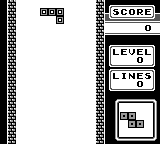

In [11]:
# Display the first attempt GIF
print("Let's see how far we get!")
display(Image(filename='model_play.gif'))
